# PQ MEASUREMENTS DATA NOTEBOOK

#### LOCATION: EDIFICIO 7 FIME
#### START TIME: MAY 14TH 2022
#### END TIME: MAY 21 ST 2022
#### POWER ANALYZER: CIRCUTOR MYEBOX 1500

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
xslx = pd.ExcelFile("PQDATA_500KVA.xlsx")

df1= pd.read_excel(xslx, "10min")
df2= pd.read_excel(xslx, "5min")
df3= pd.read_excel(xslx, "harmonics")
df4= pd.read_excel(xslx, "unbalance")

In [4]:
df1.head()

,Fecha,Current-A-x,Current-B-x,Current-C-x,ActivePower,Freq,ReactivePower,PLT-A,PLT-B,PLT-C,...,Spower,Volts-ab-x,Volts-bc-x,Volts-ca-x,Current-A-h,Current-B-h,Current-C-h,Volts-ab-h,Volts-bc-h,Volts-ca-h
0,2022-05-14 12:10:00,82.316,54.832,78.195,25,59.994,6,NaN,NaN,NaN,...,27,219.08,219.18,218.80,1.338472,0.891577,1.271463,13473.420,13479.57,13456.200
1,2022-05-14 12:20:00,80.411,47.054,76.837,25,60.001,4,1.254,5.610,0.140,...,26,220.37,221.48,221.01,1.307496,0.765106,1.249382,13552.755,13621.02,13592.115
2,2022-05-14 12:30:00,74.885,36.554,81.881,24,59.992,6,1.097,4.453,0.162,...,25,221.00,222.18,221.15,1.217642,0.594374,1.331398,13591.500,13664.07,13600.725
3,2022-05-14 12:40:00,90.701,59.304,105.554,32,59.994,6,0.997,3.890,0.186,...,33,220.11,221.20,220.23,1.474813,0.964293,1.716325,13536.765,13603.80,13544.145
4,2022-05-14 12:50:00,83.460,62.998,98.762,31,60.007,4,0.926,3.534,0.199,...,31,220.29,221.30,220.32,1.357073,1.024358,1.605886,13547.835,13609.95,13549.680


In [5]:
df2.head()

,Fecha,PF-inst,PF-min,PF-max,PF-inst-a,PF-min-a,PF-max-a
0,2022-05-14 12:15:00,0.96,0.96,0.96,0.96,0.96,0.96
1,2022-05-14 12:20:00,0.96,0.96,0.97,0.96,0.96,0.97
2,2022-05-14 12:25:00,0.97,0.97,0.97,0.97,0.97,0.97
3,2022-05-14 12:30:00,0.96,0.95,0.98,0.96,0.95,0.98
4,2022-05-14 12:35:00,0.96,0.95,0.96,0.96,0.95,0.96


In [6]:
df3.head()

,Order,a-perc-h,b-perc-h,c-perc-h
0,2,0.030919,0.028875,0.023394
1,3,0.179330,0.276378,0.386005
2,4,0.012368,0.012375,0.011697
3,5,0.142227,0.061876,0.099425
4,6,0.012368,0.012375,0.011697


In [7]:
df4.head()

,Fecha,Current-A-h,Current-B-h,Current-C-h,i-beta,%unb-iH2,Volts-ab-h,Volts-bc-h,Volts-ca-h,v-beta,%unb-vH2,%unb-iH,%unb-vH
0,2022-05-14 12:10:00,1.338472,0.891577,1.271463,0.365392,23.099012,13473.420,13479.57,13456.200,0.333334,0.103829,23.099012,0.103829
1,2022-05-14 12:20:00,1.307496,0.765106,1.249382,0.383498,29.880509,13552.755,13621.02,13592.115,0.333339,0.291120,29.880509,0.291120
2,2022-05-14 12:30:00,1.217642,0.594374,1.331398,0.419705,42.493413,13591.500,13664.07,13600.725,0.333341,0.335222,42.493413,0.335222
3,2022-05-14 12:40:00,1.474813,0.964293,1.716325,0.389859,32.123332,13536.765,13603.80,13544.145,0.333340,0.313211,32.123332,0.313211
4,2022-05-14 12:50:00,1.357073,1.024358,1.605886,0.372448,25.839764,13547.835,13609.95,13549.680,0.333339,0.300974,25.839764,0.300974


# Frecuencia

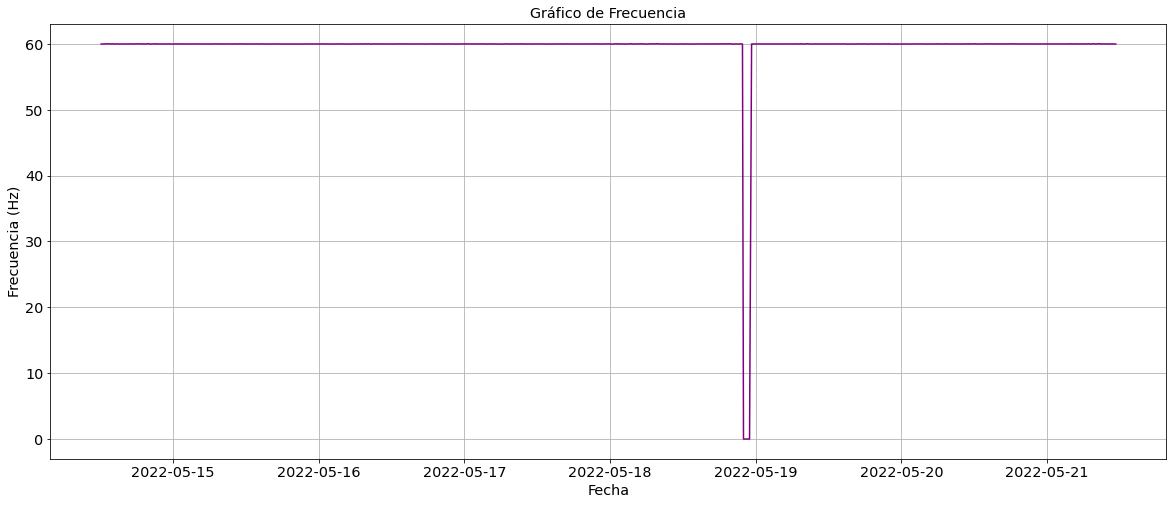

In [8]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
freq= df1['Freq']
plt.plot(x1, freq, color='purple', label='Frecuencia (Hz)')

plt.title('Gráfico de Frecuencia')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia (Hz)')
plt.grid()



## Cálculo de la frecuencia promedio

In [9]:
freq= df1['Freq']
freq.mean(axis= 'index')

59.58104685942171

# Potencia activa KW

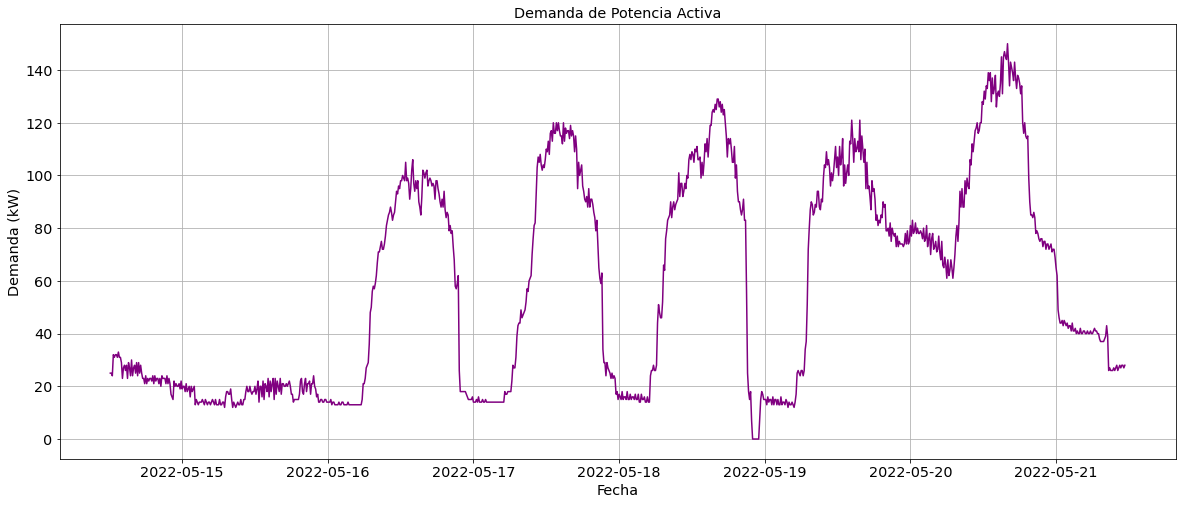

In [10]:

plt.figure(figsize=(20,8))
x1= df1['Fecha']
ap= df1['ActivePower']
plt.plot(x1, ap, color='purple', label='Potencia (kW)')

plt.title('Demanda de Potencia Activa')
plt.xlabel('Fecha')
plt.ylabel('Demanda (kW)')
plt.grid()


## Cálculo de potencia activa promedio

In [11]:
ap= df1['ActivePower']
ap.mean(axis= 'index')

57.9740777666999

# Potencia reactiva KVAR

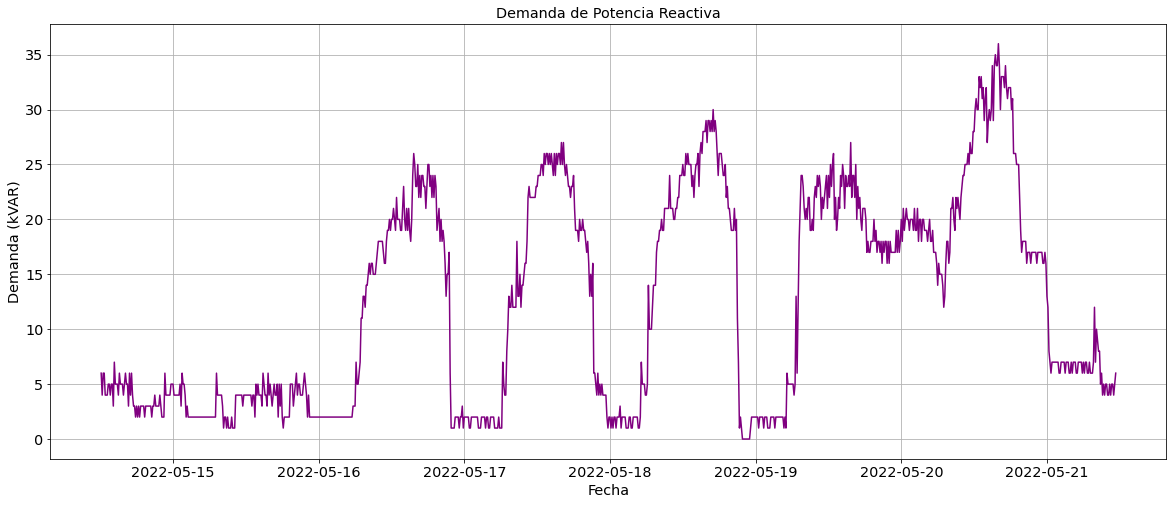

In [12]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
rp= df1['ReactivePower']
plt.plot(x1, rp, color='purple', label='Potencia Reactiva (kVAR)')

plt.title('Demanda de Potencia Reactiva')
plt.xlabel('Fecha')
plt.ylabel('Demanda (kVAR)')
plt.grid()
plt.show()


## Cálculo de potencia reactiva promedio 

In [13]:
rp= df1['ReactivePower']
rp.mean(axis= 'index')

12.451645064805584

# Potencia aparente

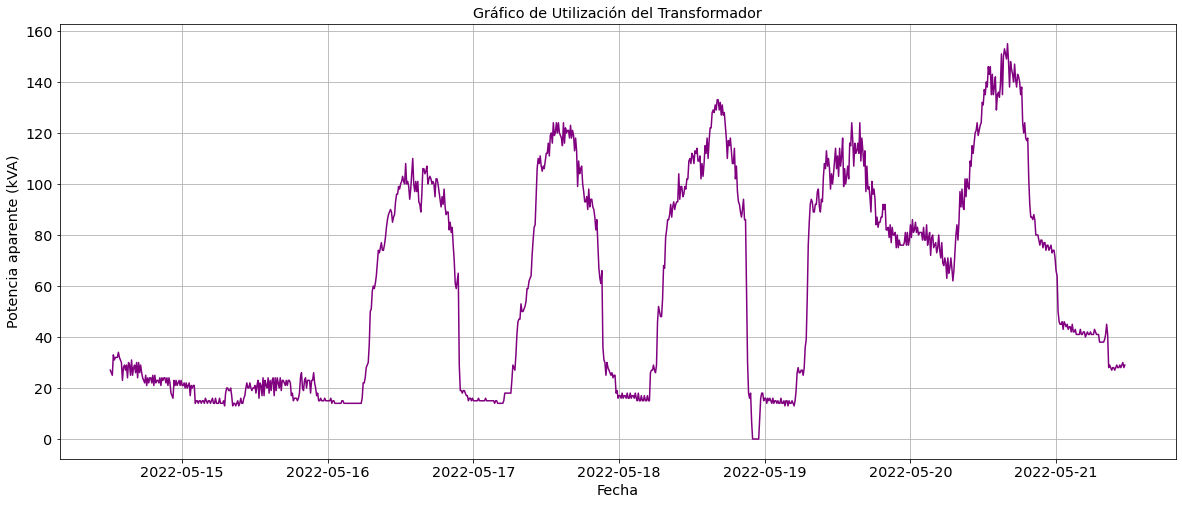

In [14]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
sp= df1['Spower']
plt.plot(x1, sp, color='purple', label='Potencia Aparente (kVA)')

plt.title('Gráfico de Utilización del Transformador')
plt.xlabel('Fecha')
plt.ylabel('Potencia aparente (kVA)')
plt.grid()
plt.show()


## Cálculo de potencia aparente promedio 

In [15]:
sp= df1['Spower']
sp.mean(axis= 'index')

60.00897308075773

# Corrientes por fase en baja tension

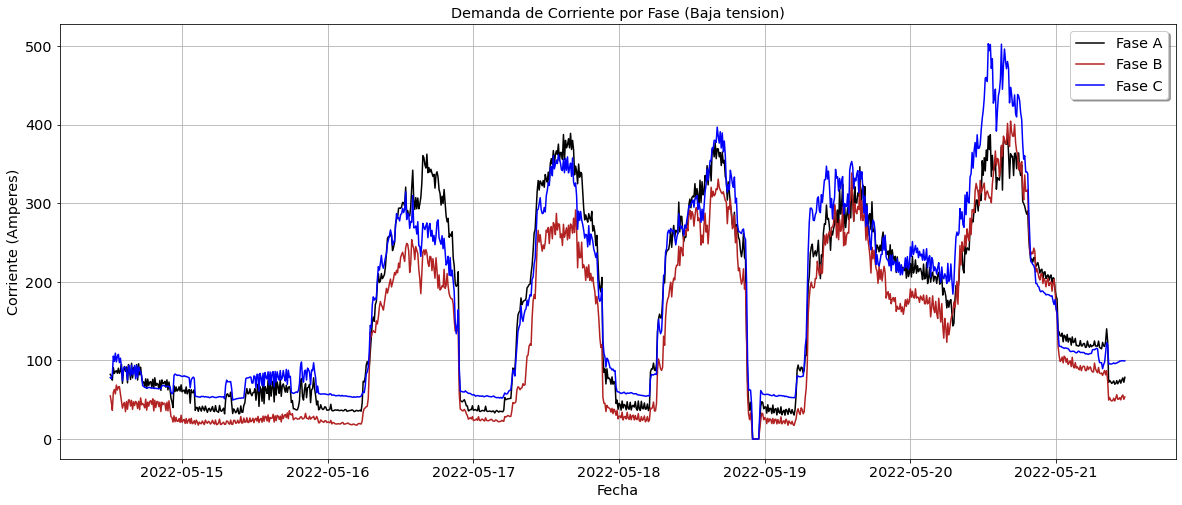

In [16]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
cax= df1['Current-A-x']
cbx= df1['Current-B-x']
ccx= df1['Current-C-x']

plt.plot(x1, cax, color ='black', label='Fase A')
plt.plot(x1, cbx, color = 'firebrick', label='Fase B')
plt.plot(x1, ccx, color = 'blue', label= 'Fase C')

plt.title('Demanda de Corriente por Fase (Baja tension)')
plt.xlabel('Fecha')
plt.ylabel('Corriente (Amperes)')
plt.grid()
plt.legend( shadow=True )
plt.show()

## Corriente promedio de la fase A en BT

In [17]:
cax= df1['Current-A-x']

cax.mean(axis= 'index')

167.9282681954135

## Corriente promedio de la fase B en BT

In [18]:
cbx= df1['Current-B-x']

cbx.mean(axis= 'index')

134.17405383848453

## Corriente promedio de la fase C en BT

In [19]:
ccx= df1['Current-C-x']

ccx.mean(axis= 'index')

177.49723828514448

# Corrientes por fase en media tension

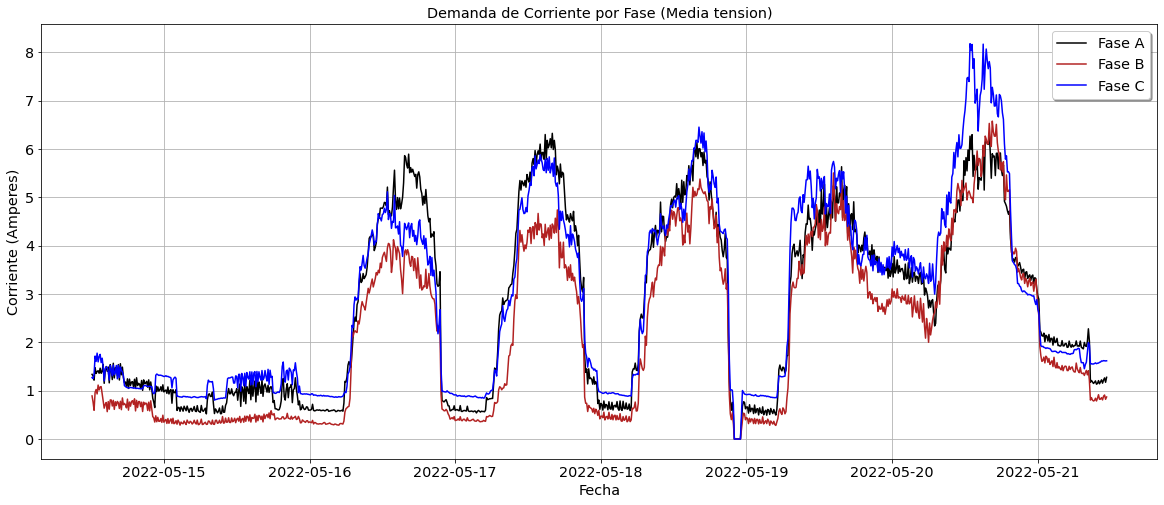

In [20]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
cah= df1['Current-A-h']
cbh= df1['Current-B-h']
cch= df1['Current-C-h']

plt.plot(x1, cah, color ='black', label='Fase A')
plt.plot(x1, cbh, color = 'firebrick', label='Fase B')
plt.plot(x1, cch, color = 'blue', label= 'Fase C')

plt.title('Demanda de Corriente por Fase (Media tension)')
plt.xlabel('Fecha')
plt.ylabel('Corriente (Amperes)')
plt.grid()
plt.legend( shadow=True )
plt.show()

## Corriente promedio de la fase A en BT

In [21]:
cah= df1['Current-A-h']

cah.mean(axis= 'index')

2.730540946266891

## Corriente promedio de la fase B en BT

In [22]:
cbh= df1['Current-B-h']

cbh.mean(axis= 'index')

2.1816919323330803

## Corriente promedio de la fase C en BT

In [23]:
cch= df1['Current-C-h']

cch.mean(axis= 'index')

2.88613395585601

# Voltajes de línea en baja tension

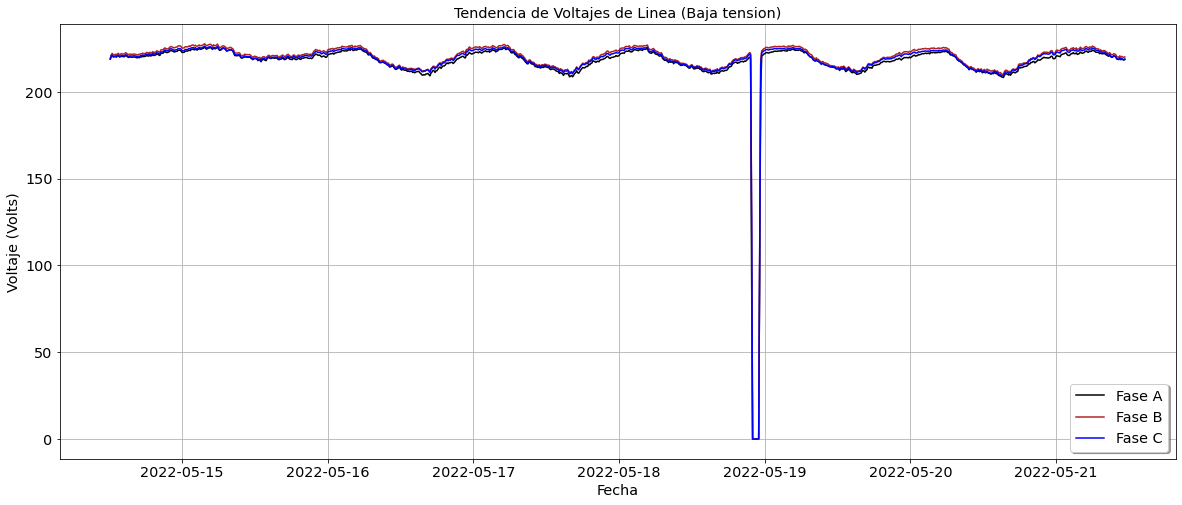

In [24]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
vabx= df1['Volts-ab-x']
vbcx= df1['Volts-bc-x']
vcax= df1['Volts-ca-x']

plt.plot(x1, vabx, color ='black', label='Fase A')
plt.plot(x1, vbcx, color = 'firebrick', label='Fase B')
plt.plot(x1, vcax, color = 'blue', label= 'Fase C')

plt.title('Tendencia de Voltajes de Linea (Baja tension)')
plt.xlabel('Fecha')
plt.ylabel('Voltaje (Volts)')
plt.grid()
plt.legend( shadow=True, loc='lower right' )
plt.show()

## Voltaje de linea AB promedio en BT

In [25]:
vabx= df1['Volts-ab-x']
vabx.mean(axis= 'index')

216.89212362911252

## Voltaje de linea BC promedio en BT

In [26]:
vbcx= df1['Volts-bc-x']
vbcx.mean(axis= 'index')

218.9329212362909

## Voltaje de linea CA promedio en BT

In [27]:
vcax= df1['Volts-ca-x']
vcax.mean(axis= 'index')

217.97598205383866

# Voltajes de línea en media tension

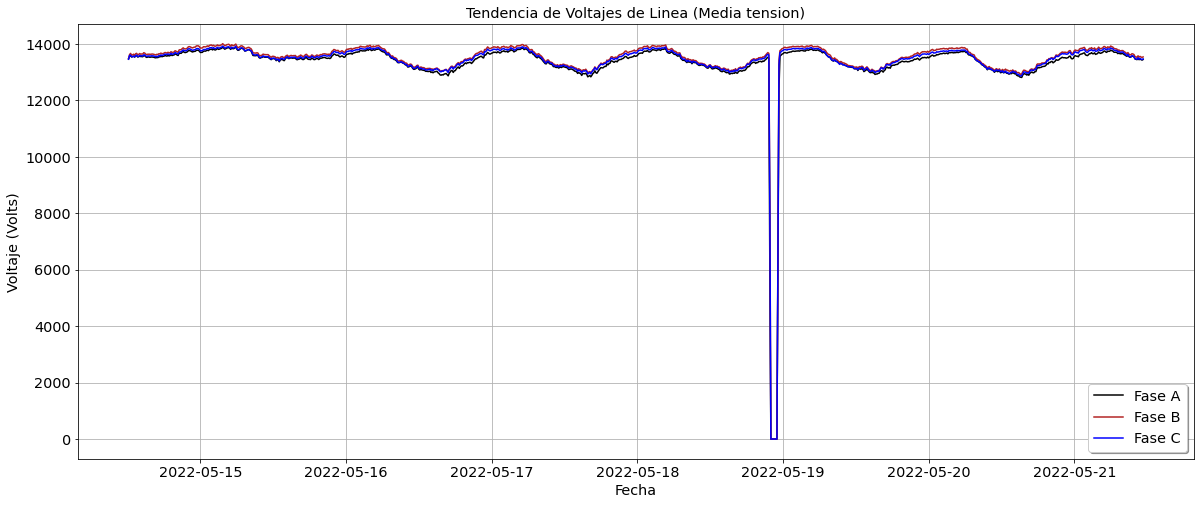

In [28]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
vabh= df1['Volts-ab-h']
vbch= df1['Volts-bc-h']
vcah= df1['Volts-ca-h']

plt.plot(x1, vabh, color ='black', label='Fase A')
plt.plot(x1, vbch, color = 'firebrick', label='Fase B')
plt.plot(x1, vcah, color = 'blue', label= 'Fase C')

plt.title('Tendencia de Voltajes de Linea (Media tension)')
plt.xlabel('Fecha')
plt.ylabel('Voltaje (Volts)')
plt.grid()
plt.legend( shadow=True, loc='lower right' )
plt.show()

## Voltaje de linea AB promedio en MT

In [29]:
vabh= df1['Volts-ab-h']
vabh.mean(axis= 'index')

13338.865603190434

## Voltaje de linea BC promedio en MT

In [30]:
vbch= df1['Volts-bc-h']
vbch.mean(axis= 'index')

13464.374656031883

## Voltaje de linea CA promedio en MT

In [31]:
vcah= df1['Volts-ca-h']
vcah.mean(axis= 'index')

13405.52289631106

# Factor de potencia

In [32]:
df2.head()

,Fecha,PF-inst,PF-min,PF-max,PF-inst-a,PF-min-a,PF-max-a
0,2022-05-14 12:15:00,0.96,0.96,0.96,0.96,0.96,0.96
1,2022-05-14 12:20:00,0.96,0.96,0.97,0.96,0.96,0.97
2,2022-05-14 12:25:00,0.97,0.97,0.97,0.97,0.97,0.97
3,2022-05-14 12:30:00,0.96,0.95,0.98,0.96,0.95,0.98
4,2022-05-14 12:35:00,0.96,0.95,0.96,0.96,0.95,0.96


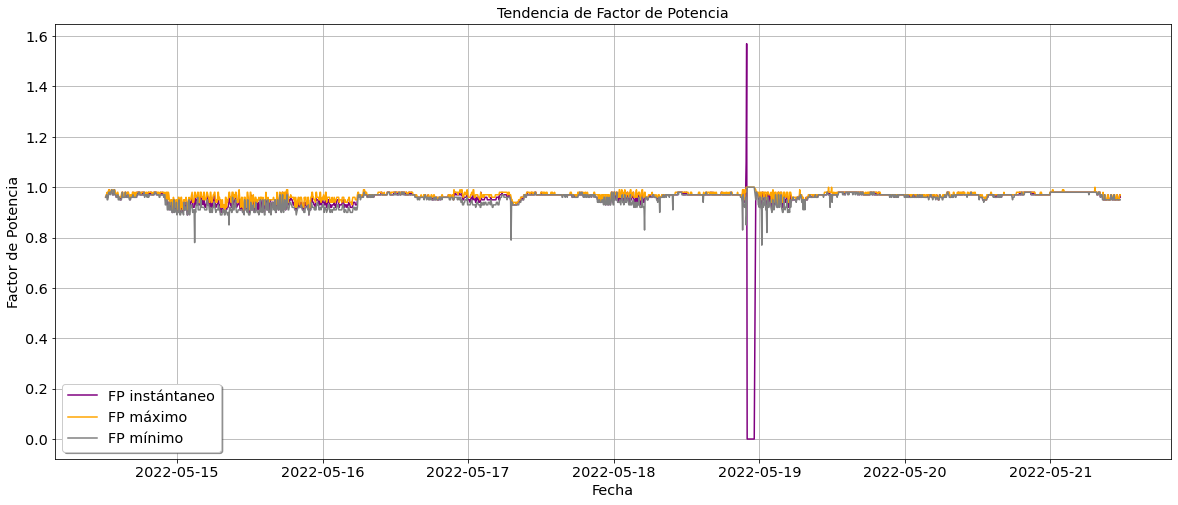

In [33]:
plt.figure(figsize=(20,8))
x1= df2['Fecha']
pfi= df2['PF-inst-a']
pfmax= df2['PF-max-a']
pfmin= df2['PF-min-a']

plt.plot(x1, pfi, color='purple', label='FP instántaneo')
plt.plot(x1, pfmax, color='orange', label='FP máximo')
plt.plot(x1, pfmin, color='gray', label='FP mínimo')

plt.title('Tendencia de Factor de Potencia')
plt.xlabel('Fecha')
plt.ylabel('Factor de Potencia')
plt.legend(loc='lower left',shadow=True)
plt.grid()


## Factor de potencia instantaneo promedio

In [34]:
pfi= df2['PF-inst-a']

pfi.mean(axis='index')

0.9531571072319421

## Factor de potencia maximo promedio

In [35]:
pfmax= df2['PF-max-a']

pfmax.mean(axis='index')

0.968344139650891

## Factor de potencia minimo promedio

In [36]:
pfmin= df2['PF-min-a']

pfmin.mean(axis='index')

0.9524738154613674

## Requerimiento de Factor de potencia de acuerdo al CDR

In [40]:
df2['PF-inst-a'].value_counts(bins=[0,0.949,0.99], normalize=True)

(0.949, 0.99]      0.809975
(-0.001, 0.949]    0.189027
Name: PF-inst-a, dtype: float64

In [41]:
df2['PF-max-a'].value_counts(bins=[0,0.949,0.99], normalize=True)

(0.949, 0.99]      0.925686
(-0.001, 0.949]    0.064339
Name: PF-max-a, dtype: float64

In [42]:
df2['PF-min-a'].value_counts(bins=[0,0.949,0.99], normalize=True)

(0.949, 0.99]      0.705736
(-0.001, 0.949]    0.286783
Name: PF-min-a, dtype: float64

# Flicker PST PLT

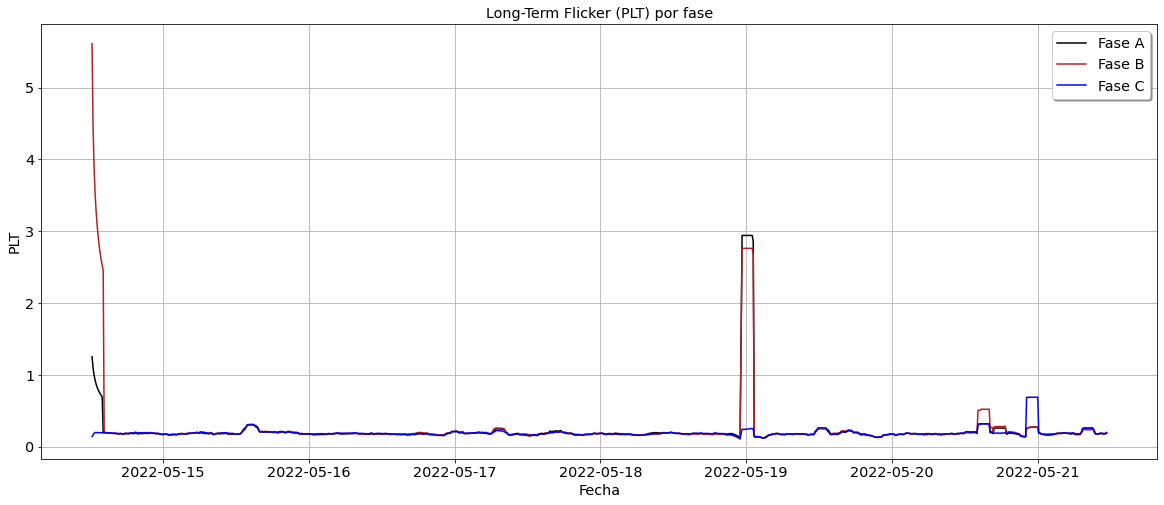

In [43]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
plta= df1['PLT-A']
pltb= df1['PLT-B']
pltc= df1['PLT-C']

plt.plot(x1, plta, color ='black', label='Fase A')
plt.plot(x1, pltb, color = 'firebrick', label='Fase B')
plt.plot(x1, pltc, color = 'blue', label= 'Fase C')

plt.title('Long-Term Flicker (PLT) por fase')
plt.xlabel('Fecha')
plt.ylabel('PLT')
plt.grid()
plt.legend( shadow=True, loc='upper right' )
plt.show()

## Flicker PLT - A promedio

In [44]:
plta= df1['PLT-A']

plta.mean(axis='index')

0.2271057884231538

## Flicker PLT - B promedio

In [45]:
pltb= df1['PLT-B']

pltb.mean(axis='index')

0.26094510978043933

## Flicker PLT - C promedio

In [46]:
pltc= df1['PLT-C']

pltc.mean(axis='index')

0.19363273453093793

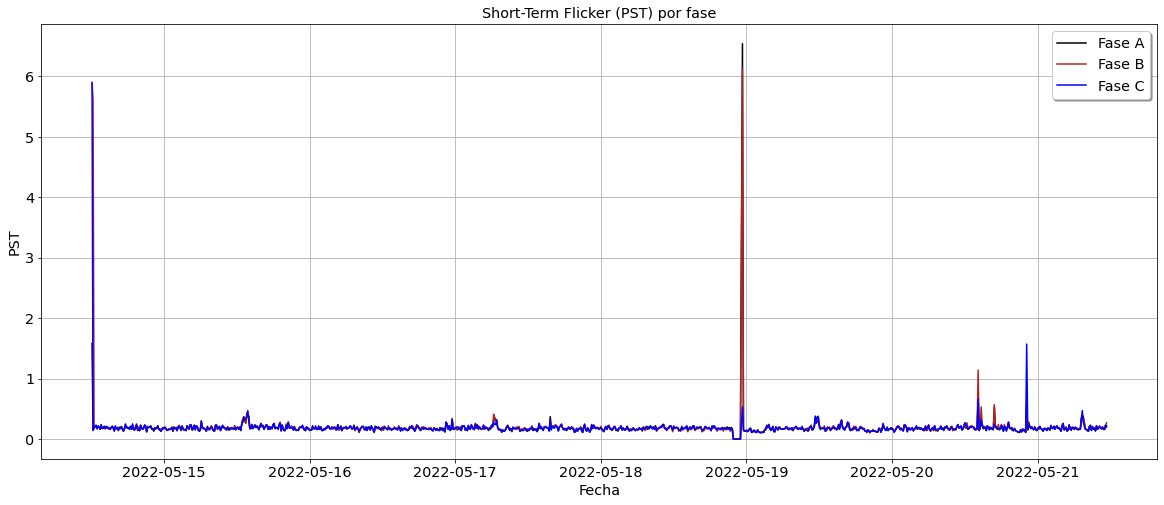

In [47]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
psta= df1['PST-A']
pstb= df1['PST-B']
pstc= df1['PST-C']

plt.plot(x1, psta, color ='black', label='Fase A')
plt.plot(x1, pstb, color = 'firebrick', label='Fase B')
plt.plot(x1, pstc, color = 'blue', label= 'Fase C')

plt.title('Short-Term Flicker (PST) por fase')
plt.xlabel('Fecha')
plt.ylabel('PST')
plt.grid()
plt.legend( shadow=True, loc='upper right' )
plt.show()

## Flicker PST - A promedio

In [48]:
psta= df1['PST-A']

psta.mean(axis='index')

0.18519441674975

## Flicker PST - B promedio

In [49]:
pstb= df1['PST-B']

pstb.mean(axis='index')

0.19864406779660979

## Flicker PST - C promedio

In [50]:
pstc= df1['PST-C']

pstc.mean(axis='index')

0.18594217347956066

# Desbalance de voltaje y corriente

In [51]:
x1= df1['Fecha']

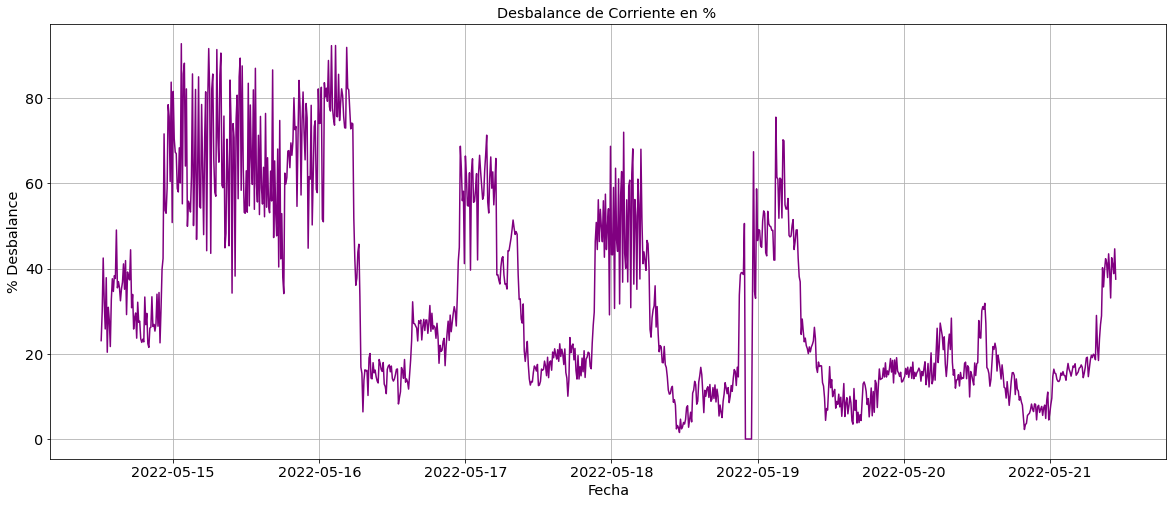

In [52]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
iunbalance= df4['%unb-iH']

plt.plot(x1, iunbalance, color ='purple', label='Desbalance de corriente')

plt.title('Desbalance de Corriente en % ')
plt.xlabel('Fecha')
plt.ylabel('% Desbalance')
plt.grid()
plt.show()

## Promedio de desbalance de corriente

In [53]:
iunbalance= df4['%unb-iH']

iunbalance.mean(axis='index')

32.73759127625

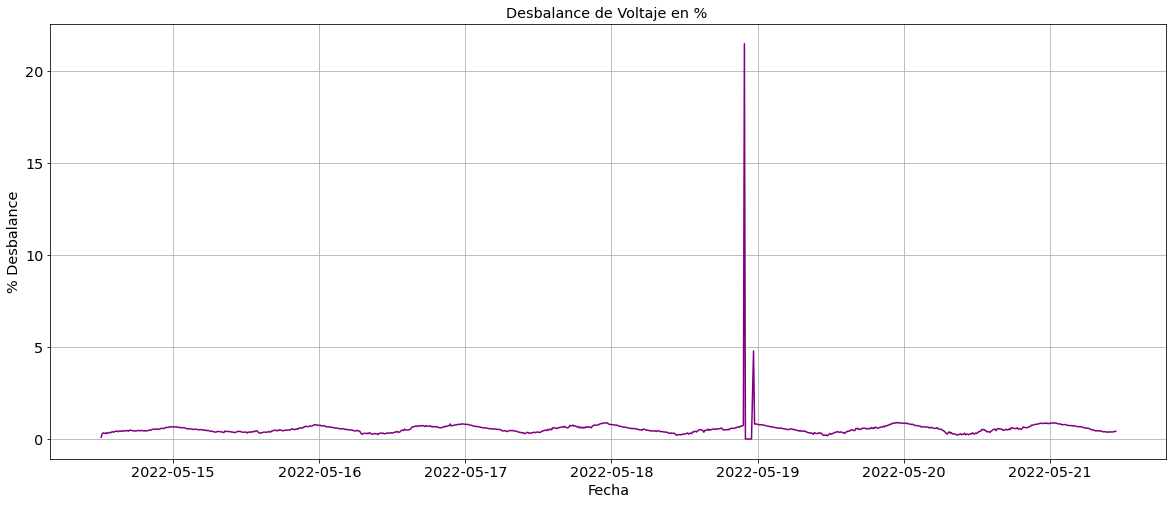

In [54]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
vunbalance= df4['%unb-vH']

plt.plot(x1, vunbalance, color ='purple', label='Desbalance de voltaje')

plt.title('Desbalance de Voltaje en % ')
plt.xlabel('Fecha')
plt.ylabel('% Desbalance')
plt.grid()
plt.show()

## Promedio de desbalance de voltaje

In [55]:
vunbalance= df4['%unb-vH']

vunbalance.mean(axis='index')

0.5569907464582708

# Armonicos de corriente

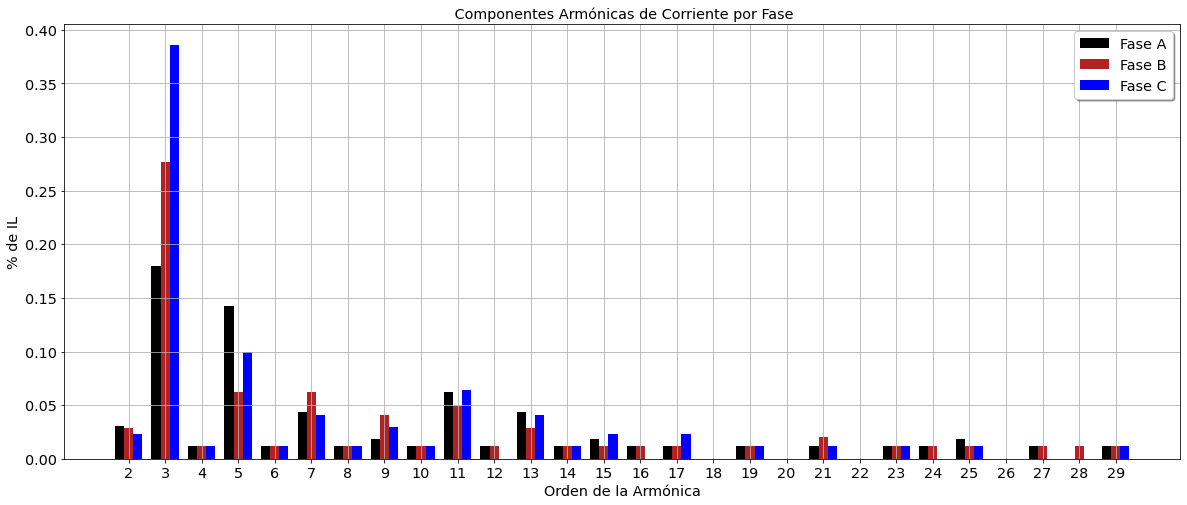

In [56]:
plt.figure(figsize=(20,8))
orden= df3['Order']
aperch= df3['a-perc-h']
bperch= df3['b-perc-h']
cperch= df3['c-perc-h']

width=0.25

indx= np.arange(len(orden))

plt.bar(indx - width, aperch, width=width, color ='black', label='Fase A')
plt.bar(indx, bperch, width=width, color ='firebrick', label='Fase B')
plt.bar(indx + width, cperch, width=width, color ='blue', label='Fase C')


plt.title(' Componentes Armónicas de Corriente por Fase')
plt.xlabel('Orden de la Armónica')
plt.ylabel('% de IL')
plt.xticks(ticks=indx, labels=orden)

plt.grid()
plt.legend( shadow=True )
plt.show()